# Preamble

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading data

In [2]:
PATH1 = "../data/Desafio de Dados FieldPRO/Sensor_FieldPRO.csv"
PATH2 = "../data/Desafio de Dados FieldPRO/Estacao_Convencional.csv"

sensor_df = pd.read_csv(PATH1)
estacao_df = pd.read_csv(PATH2)

# Preprocessing

In [3]:
sensor_df.shape, sensor_df.columns

((1711, 7),
 Index(['Datetime – utc', 'air_humidity_100', 'air_temperature_100',
        'atm_pressure_main', 'num_of_resets', 'piezo_charge',
        'piezo_temperature'],
       dtype='object'))

In [4]:
estacao_df.shape, estacao_df.columns

((2256, 3), Index(['data', 'Hora (Brasília)', 'chuva'], dtype='object'))

In [5]:
sensor_df.isna().sum()
#sensor_df[sensor_df.air_humidity_100.isna()]
#sensor_df[sensor_df.num_of_resets.eq(3)]

Datetime – utc         0
air_humidity_100       6
air_temperature_100    6
atm_pressure_main      0
num_of_resets          0
piezo_charge           0
piezo_temperature      0
dtype: int64

In [6]:
sensor_df[sensor_df['air_humidity_100'].isna()]

,Datetime – utc,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature
1,2020-10-01T00:00:00Z,NaN,NaN,9412,0,45025,31
6,2020-10-01T05:00:00Z,NaN,NaN,9411,0,44537,30
12,2020-10-01T12:00:00Z,NaN,NaN,9438,0,43874,30
16,2020-10-01T16:00:00Z,NaN,NaN,9460,0,43259,30
20,2020-10-01T21:00:00Z,NaN,NaN,9379,0,41914,37
30,2020-10-02T08:00:00Z,NaN,NaN,9398,0,41083,19


In [7]:
sensor_df['data'] = pd.to_datetime(sensor_df['Datetime – utc'], format='mixed')

In [8]:
sensor_df['data'] = sensor_df.data.astype(str).str.split('+',expand=True)[0]

In [9]:
sensor_df.data

0       2020-09-30 23:00:00
1       2020-10-01 00:00:00
2       2020-10-01 01:00:00
3       2020-10-01 02:00:00
4       2020-10-01 03:00:00
               ...         
1706    2020-12-11 09:00:00
1707    2020-12-11 10:00:00
1708    2020-12-11 11:00:00
1709    2020-12-11 12:00:00
1710    2020-12-11 13:00:00
Name: data, Length: 1711, dtype: object

In [10]:
estacao_df.isna().sum()

data               0
Hora (Brasília)    0
chuva              0
dtype: int64

In [11]:
estacao_df['data'] = estacao_df.data + ' ' + estacao_df['Hora (Brasília)']

In [12]:
estacao_df

,data,Hora (Brasília),chuva
0,2020-09-01 00:00:00,00:00:00,0.0
1,2020-09-01 01:00:00,01:00:00,0.0
2,2020-09-01 02:00:00,02:00:00,0.0
3,2020-09-01 03:00:00,03:00:00,0.0
4,2020-09-01 04:00:00,04:00:00,0.0
...,...,...,...
2251,2020-12-03 19:00:00,19:00:00,0.0
2252,2020-12-03 20:00:00,20:00:00,0.0
2253,2020-12-03 21:00:00,21:00:00,0.0
2254,2020-12-03 22:00:00,22:00:00,0.0


In [13]:
dados_df = pd.merge(sensor_df,estacao_df[['data','chuva']], on='data')

In [14]:
dados_df[dados_df['air_humidity_100'].isna()]

,Datetime – utc,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature,data,chuva
1,2020-10-01T00:00:00Z,NaN,NaN,9412,0,45025,31,2020-10-01 00:00:00,0.0
6,2020-10-01T05:00:00Z,NaN,NaN,9411,0,44537,30,2020-10-01 05:00:00,0.0
12,2020-10-01T12:00:00Z,NaN,NaN,9438,0,43874,30,2020-10-01 12:00:00,0.0
16,2020-10-01T16:00:00Z,NaN,NaN,9460,0,43259,30,2020-10-01 16:00:00,0.0
19,2020-10-01T21:00:00Z,NaN,NaN,9379,0,41914,37,2020-10-01 21:00:00,0.0
29,2020-10-02T08:00:00Z,NaN,NaN,9398,0,41083,19,2020-10-02 08:00:00,0.0


When the data are NaN, there is no rainfall. Since most of the data is not rain, these lines can be deleted without significant loss of information.

In [15]:
dados_df.dropna(inplace=True)

In [16]:
dados_df.chuva.unique()

array([ 0. ,  0.2,  1.2,  2.2,  9.2,  4. ,  0.4,  1.6,  0.8,  0.6,  3. ,
        1.8,  5.6,  2.4,  2.8, 16.8,  3.6,  4.2,  3.4,  2. ,  6.8,  6.2,
        3.8,  4.6,  1. , 15.2,  8.2])

# Descriptive analysis
- The no-rain data represents the distribution of rainfall (figure on the left).
- To better see the distribution of the rainfall data, the histogram is constructed ignoring the no rainfall data (figure on the right).

Text(0.5, 0, 'Rain')

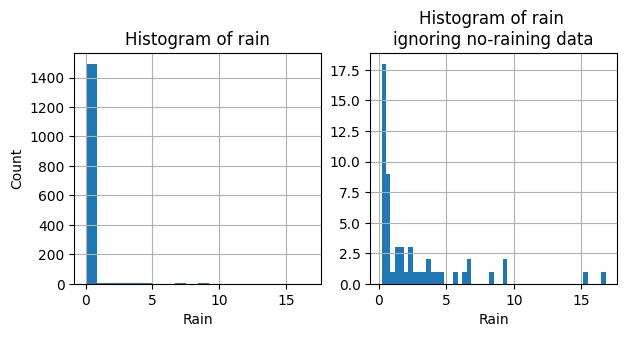

In [17]:
plt.subplots(1,2, figsize=(7,3))

plt.subplot(121)
dados_df.chuva.hist(bins=20)
plt.title('Histogram of rain')
plt.xlabel('Rain')
plt.ylabel('Count')

plt.subplot(122)
dados_df[~dados_df.chuva.eq(0)].chuva.hist(bins=50)
plt.title('Histogram of rain \nignoring no-raining data')
plt.xlabel('Rain')

- The figure on the left shows that there is a small difference between the ambient temperature and that of the sensor
- The figure on the right shows that whenever the board is restarted, the capacitor charge starts at its highest value
- Also, on the right, it can be seen that only a small variation in the slope of the discharge cycle informs about the rain. Further treatment of this variable is required.

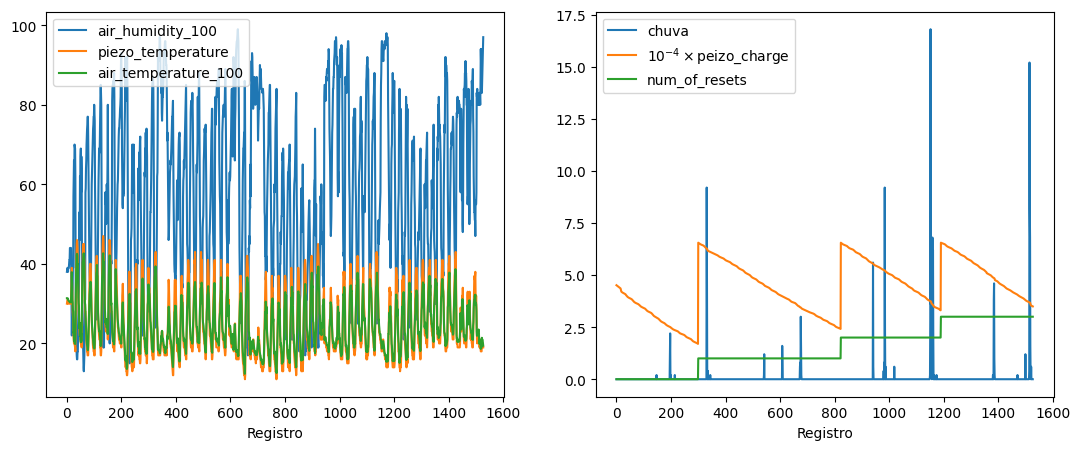

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(13,5))

plt.subplot(121)
ax1.plot(dados_df[['air_humidity_100']], label='air_humidity_100')
ax1.plot(dados_df[['piezo_temperature']], label='piezo_temperature')
ax1.plot(dados_df[['air_temperature_100']], label='air_temperature_100')
plt.xlabel('Registro')
plt.legend()

plt.subplot(122)
ax2.plot(dados_df[['chuva']], label='chuva')
ax2.plot(dados_df[['piezo_charge']]/10000, label=r'$10^{-4}\times $peizo_charge')
ax2.plot(dados_df[['num_of_resets']], label='num_of_resets')
plt.xlabel('Registro')
plt.legend()


# Feature engineering
In order to understand how the sensor captures information about rainfall behavior, it is necessary to perform some transformations.
- Most of the information about the signal fluctuations is in the difference between two consecutive records.
- The mean squared of the differences drives the signal to $0$.

In [19]:
# Warning! you must be carefull to run this cell twice without restarting the kernell
dados_df['dif_charge'] = dados_df.groupby('num_of_resets').piezo_charge.diff(-1)
rms = np.sqrt(dados_df.dif_charge.apply(lambda x: x**2).mean())
dados_df['dif_charge'] = (dados_df['dif_charge']-rms)#*5
#rms

- Rescaling helps interpretation.
- The successive approximations show that there is a displacement

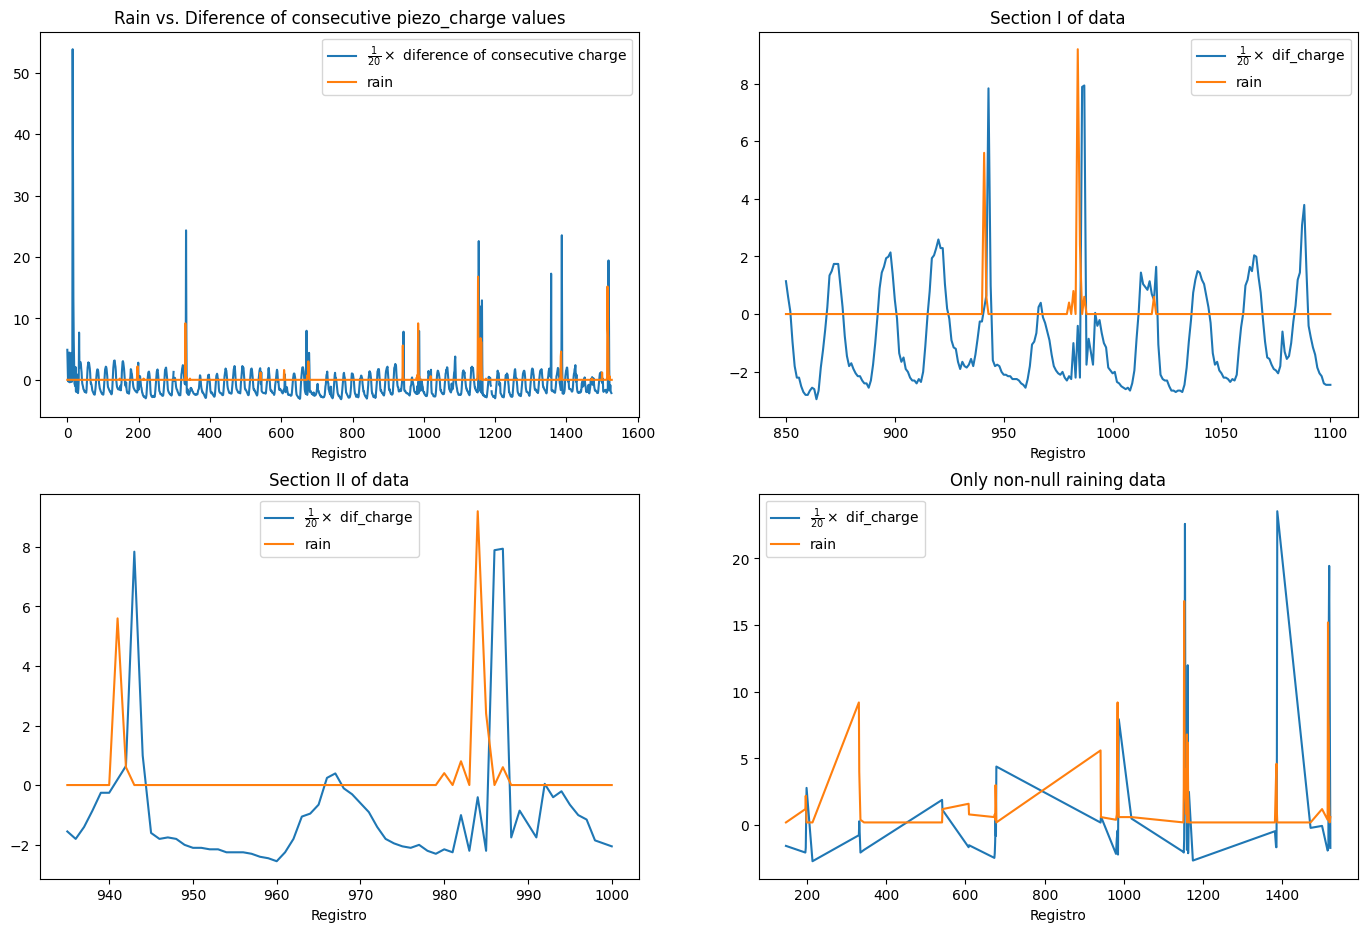

In [20]:
fig, (ax1, ax2) = plt.subplots(2,2,figsize=(17,11))

plt.subplot(221)
ax1[0].plot(dados_df[['dif_charge']]/20, label=r'$\frac{1}{20}\times$ diference of consecutive charge')
ax1[0].plot(dados_df[['chuva']], label='rain')
plt.title('Rain vs. Diference of consecutive piezo_charge values')
plt.xlabel('Registro')
plt.legend()

plt.subplot(222)
ax1[1].plot(dados_df.loc[850:1100,['dif_charge']]/20, label=r'$\frac{1}{20}\times$ dif_charge')
ax1[1].plot(dados_df.loc[850:1100].chuva, label='rain')
plt.title('Section I of data')
plt.xlabel('Registro')
plt.legend()

plt.subplot(223)
ax2[0].plot(dados_df.loc[935:1000,['dif_charge']]/20, label=r'$\frac{1}{20}\times$ dif_charge')
ax2[0].plot(dados_df.loc[935:1000,['chuva']], label='rain')
plt.title('Section II of data')
plt.xlabel('Registro')
plt.legend()

plt.subplot(224)
ax2[1].plot(dados_df.loc[dados_df.chuva.gt(0),['dif_charge']]/20, label=r'$\frac{1}{20}\times$ dif_charge')
ax2[1].plot(dados_df.loc[dados_df.chuva.gt(0),['chuva']], label='rain')
plt.title('Only non-null raining data')
plt.xlabel('Registro')
plt.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


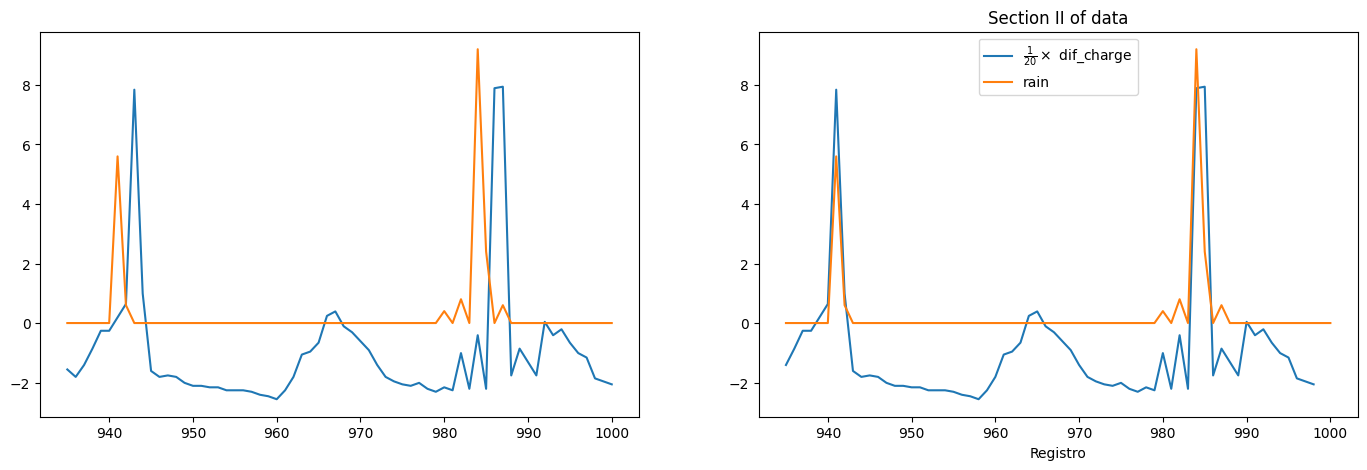

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(17,5))

ax1.plot(dados_df.loc[935:1000,['dif_charge']]/20, label=r'$\frac{1}{20}\times$ dif_charge')
ax1.plot(dados_df.loc[935:1000,['chuva']], label='rain')
plt.title('Section II of data')
plt.xlabel('Registro')
plt.legend()

ax2.plot(dados_df.loc[935:1000,['dif_charge']].shift(-2)/20, label=r'$\frac{1}{20}\times$ dif_charge')
ax2.plot(dados_df.loc[935:1000,['chuva']], label='rain')
plt.title('Section II of data')
plt.xlabel('Registro')
plt.legend()

In [22]:
dados_df['dif_charge'] = dados_df.groupby('num_of_resets').piezo_charge.diff(-1).shift(-2)
#dados_df['dif_charge'] = dados_df.dif_charge.shift(-2)
#dados_df.dropna(inplace=True)

#dados_df['dif_charge'] = (100*dados_df['dif_charge']/dados_df['piezo_charge'])
#rms = np.sqrt(dados_df.dif_charge.apply(lambda x: x**2).mean())
#dados_df['dif_charge'] = (dados_df['dif_charge']-rms)#*5
#rms

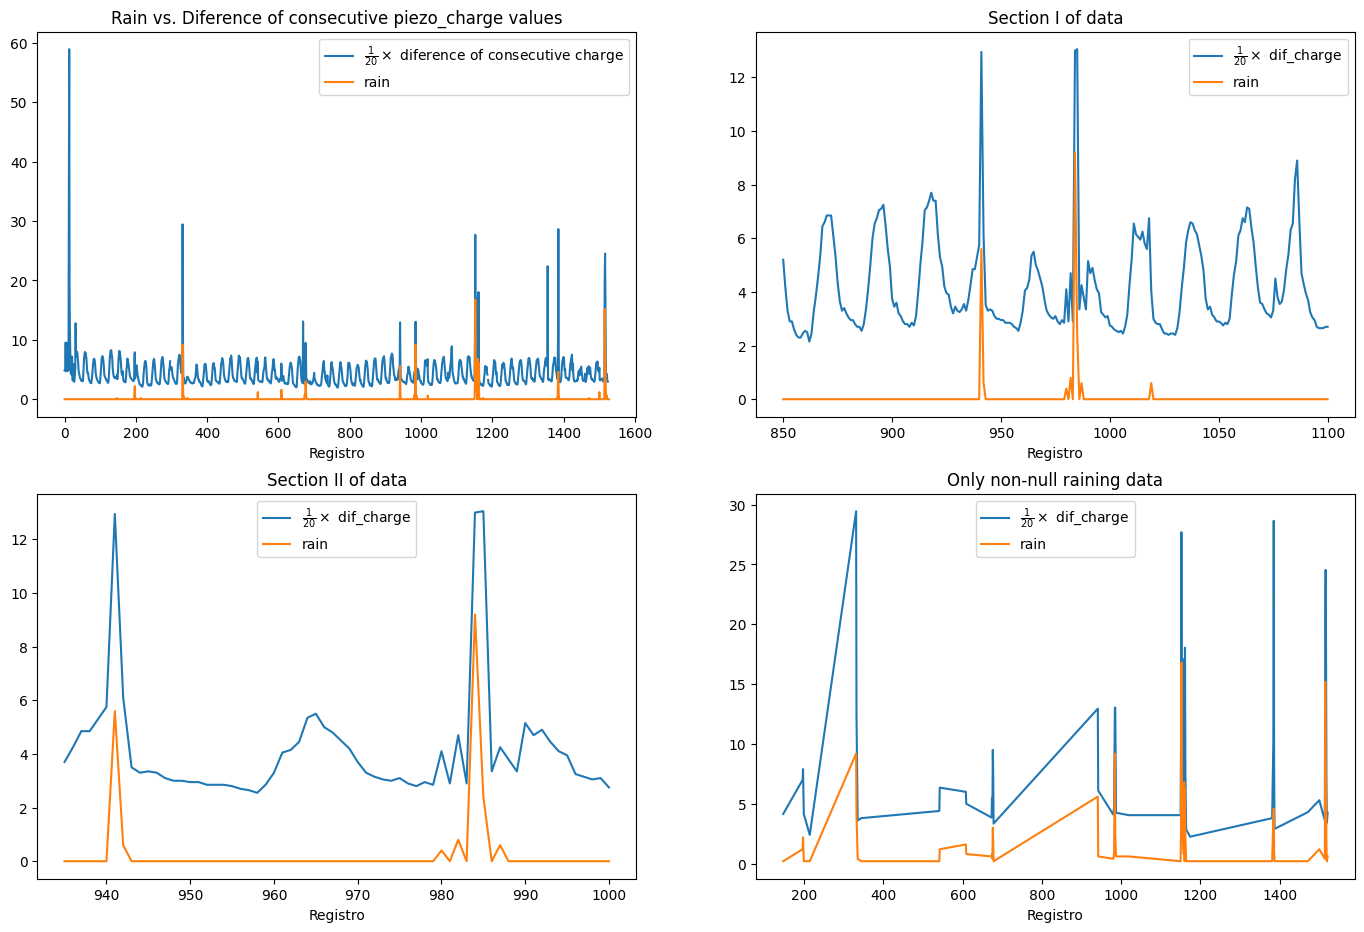

In [23]:
fig, (ax1, ax2) = plt.subplots(2,2,figsize=(17,11))

plt.subplot(221)
ax1[0].plot(dados_df[['dif_charge']]/20, label=r'$\frac{1}{20}\times$ diference of consecutive charge')
ax1[0].plot(dados_df[['chuva']], label='rain')
plt.title('Rain vs. Diference of consecutive piezo_charge values')
plt.xlabel('Registro')
plt.legend()

plt.subplot(222)
ax1[1].plot(dados_df.loc[850:1100,['dif_charge']]/20, label=r'$\frac{1}{20}\times$ dif_charge')
ax1[1].plot(dados_df.loc[850:1100].chuva, label='rain')
plt.title('Section I of data')
plt.xlabel('Registro')
plt.legend()

plt.subplot(223)
ax2[0].plot(dados_df.loc[935:1000,['dif_charge']]/20, label=r'$\frac{1}{20}\times$ dif_charge')
ax2[0].plot(dados_df.loc[935:1000,['chuva']], label='rain')
plt.title('Section II of data')
plt.xlabel('Registro')
plt.legend()

plt.subplot(224)
ax2[1].plot(dados_df.loc[dados_df.chuva.gt(0),['dif_charge']]/20, label=r'$\frac{1}{20}\times$ dif_charge')
ax2[1].plot(dados_df.loc[dados_df.chuva.gt(0),['chuva']], label='rain')
plt.title('Only non-null raining data')
plt.xlabel('Registro')
plt.legend()


In [24]:
dados_df[['piezo_temperature','air_temperature_100']]
dados_df['dif_temp'] = dados_df['air_temperature_100'] - dados_df['piezo_temperature'].astype(float)

In [25]:
dados_df['dq/dT'] = (dados_df.dif_charge/dados_df.dif_temp.shift(-1))
dados_df.dropna(inplace=True)
#dados_df['dq/dT'] = (np.log(dados_df.dif_charge)/np.log(dados_df.dif_temp)) #testing

In [26]:
#pd.concat([dados_df,dados_df['chuva'].diff(1).shift(-1)], axis=1)[[]]

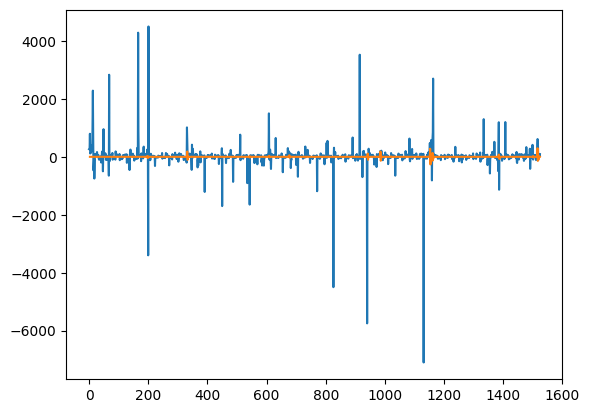

In [27]:
plt.plot(dados_df['dq/dT'])
plt.plot(20*(dados_df['chuva'].diff(1).shift(1)))

- Rainfall is also represented by a two-value variable to separate data that does not rain from data that does rain.

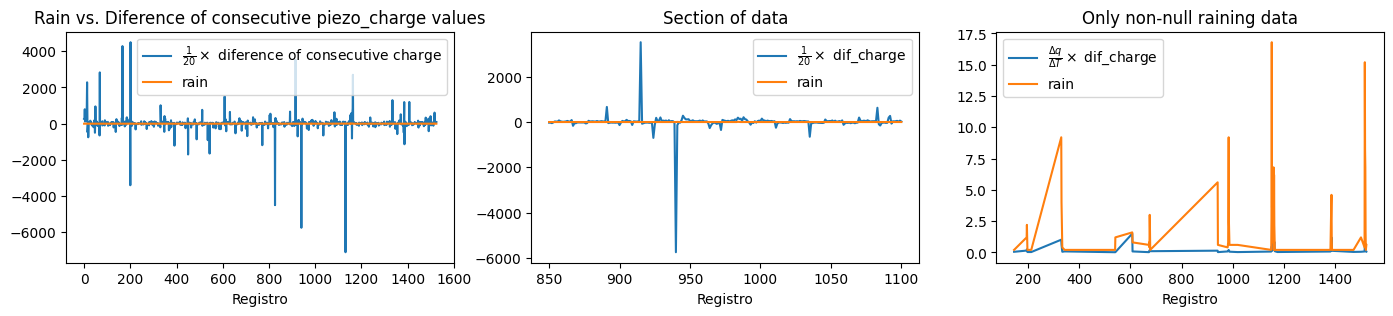

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(17,3))

plt.subplot(131)
ax1.plot(dados_df[['dq/dT']], label=r'$\frac{1}{20}\times$ diference of consecutive charge')
ax1.plot(dados_df[['chuva']], label='rain')
plt.title('Rain vs. Diference of consecutive piezo_charge values')
plt.xlabel('Registro')
plt.legend()

plt.subplot(132)
ax2.plot(dados_df.loc[850:1100,['dq/dT']], label=r'$\frac{1}{20}\times$ dif_charge')
ax2.plot(dados_df.loc[850:1100].chuva, label='rain')
plt.title('Section of data')
plt.xlabel('Registro')
plt.legend()

plt.subplot(133)
ax3.plot(np.abs(dados_df.loc[dados_df.chuva.gt(0),['dq/dT']])/1000, label=r'$\frac{\Delta q}{\Delta T}\times$ dif_charge')
ax3.plot(dados_df.loc[dados_df.chuva.gt(0),['chuva']], label='rain')
plt.title('Only non-null raining data')
plt.xlabel('Registro')
plt.legend()


In [29]:
dados_df['precp'] = dados_df.chuva.apply(lambda x: 0 if x==0.0 else 1)
#dados_df['precp'] = dados_df.chuva.apply(lambda x: 0 if x==0.0 else 1 if x<=2.5 else 2 if x<=5 else 3)

In [30]:
dados_df

,Datetime – utc,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature,data,chuva,dif_charge,dif_temp,dq/dT,precp
0,2020-09-30T23:00:00Z,38.0,31.366,9412,0,45123,30,2020-09-30 23:00:00,0.0,97.0,1.366,265.027322,0
2,2020-10-01T01:00:00Z,39.0,31.366,9419,0,44923,31,2020-10-01 01:00:00,0.0,96.0,0.366,298.136646,0
3,2020-10-01T02:00:00Z,39.0,31.322,9419,0,44825,31,2020-10-01 02:00:00,0.0,191.0,0.322,795.833333,0
4,2020-10-01T03:00:00Z,38.0,31.240,9416,0,44728,31,2020-10-01 03:00:00,0.0,94.0,0.240,113.526570,0
5,2020-10-01T04:00:00Z,39.0,30.828,9411,0,44632,30,2020-10-01 04:00:00,0.0,96.0,0.828,139.941691,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,2020-12-03T16:00:00Z,94.0,18.900,9440,3,35492,18,2020-12-03 16:00:00,0.0,70.0,0.900,41.176471,0
1521,2020-12-03T17:00:00Z,90.0,19.700,9420,3,35355,18,2020-12-03 17:00:00,0.6,85.0,1.700,59.859155,1
1522,2020-12-03T18:00:00Z,83.0,21.420,9413,3,35287,20,2020-12-03 18:00:00,0.0,64.0,1.420,72.727273,0
1523,2020-12-03T19:00:00Z,86.0,20.880,9412,3,35217,20,2020-12-03 19:00:00,0.0,61.0,0.880,30.808081,0


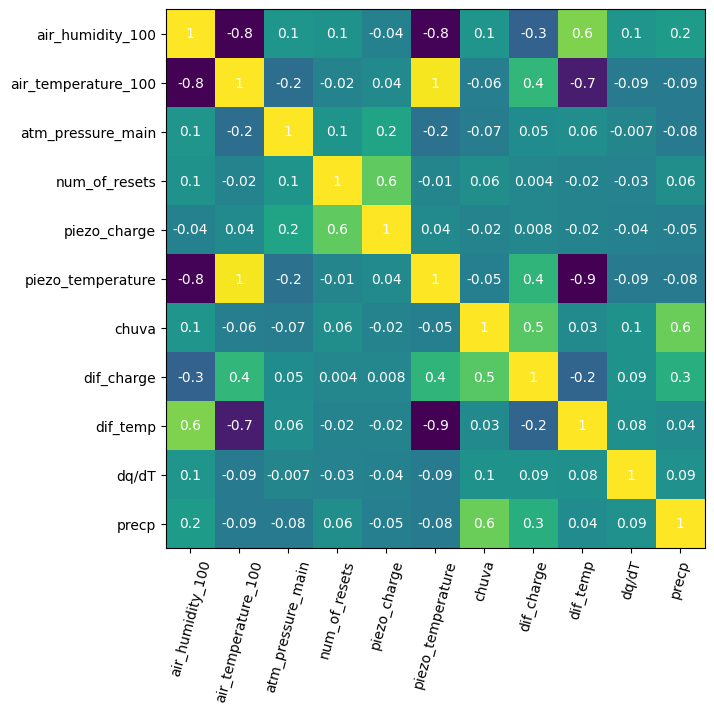

In [31]:
labels = np.array(dados_df.drop(['Datetime – utc', 'data'], axis=1).corr().columns)
heatmap = dados_df.drop(['Datetime – utc', 'data'], axis=1).corr().to_numpy()
n = len(heatmap)

fig, ax = plt.subplots(figsize=(7,7))

ax.imshow(heatmap)

ax.set_yticks(np.arange(n), labels=labels)
ax.set_xticks(np.arange(n), labels=labels, rotation=75)

for l in range(n):
    for k in range(n):
        annot = f'{heatmap[k,l]:.1g}'
        ax.text(k, l, annot, ha='center', va='center', color='w')

#fig.show()


## Calibrator
## Classification
Due to the huge amount of non-rainfall values, we start by fitting a classification model.

In [32]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBRegressor, XGBClassifier
from hyperopt import STATUS_OK, fmin, tpe, hp, Trials

In [33]:
dados_df.columns

Index(['Datetime – utc', 'air_humidity_100', 'air_temperature_100',
       'atm_pressure_main', 'num_of_resets', 'piezo_charge',
       'piezo_temperature', 'data', 'chuva', 'dif_charge', 'dif_temp', 'dq/dT',
       'precp'],
      dtype='object')

In [34]:
cols = ['air_humidity_100', 'atm_pressure_main', 'air_temperature_100',
        'dif_charge', 'dif_temp', 'dq/dT',
        'precp']

<Axes: >

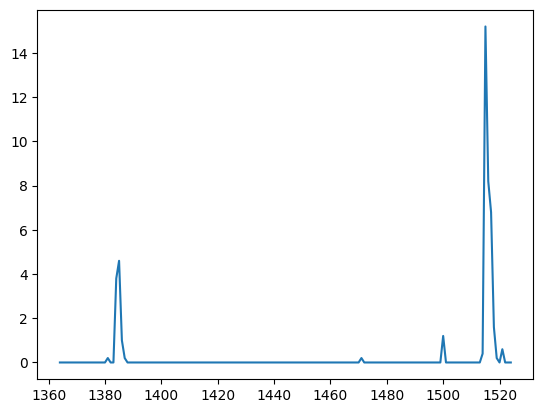

In [35]:
int(dados_df.shape[0]*0.9)
dados_valid_df = dados_df.loc[int(dados_df.shape[0]*0.9):]
dados_valid_df.chuva.plot()

In [36]:
X = dados_df.loc[:int(dados_df.shape[0]*0.9),cols].copy()
y = X.pop('precp')

In [37]:
X.columns

Index(['air_humidity_100', 'atm_pressure_main', 'air_temperature_100',
       'dif_charge', 'dif_temp', 'dq/dT'],
      dtype='object')

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [39]:
models = {'LogisticRegression':LogisticRegression, 'RandomForestClassifier':RandomForestClassifier, 'XGBClassifier':XGBClassifier}

In [40]:
for model in models:
    print(model)
    md = models[model]()
    #print(md)
    md.fit(X_train, y_train)
    #print('score: ', md.score(X_train,y_train), md.score(X_test,y_test))
    print(classification_report(y_test, md.predict(X_test)))


LogisticRegression
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       403
           1       0.00      0.00      0.00         4

    accuracy                           0.99       407
   macro avg       0.50      0.50      0.50       407
weighted avg       0.98      0.99      0.99       407

RandomForestClassifier


c:\Users\CarlosSolano.iel\Downloads\rain\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CarlosSolano.iel\Downloads\rain\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CarlosSolano.iel\Downloads\rain\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       403
           1       0.00      0.00      0.00         4

    accuracy                           0.99       407
   macro avg       0.50      0.50      0.50       407
weighted avg       0.98      0.99      0.98       407

XGBClassifier
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       403
           1       0.33      0.25      0.29         4

    accuracy                           0.99       407
   macro avg       0.66      0.62      0.64       407
weighted avg       0.99      0.99      0.99       407



### Bootstraping classification

In [41]:
X_bst = pd.concat([X_train, y_train], axis=1)

In [42]:
N = 500

In [43]:
X_bst = pd.concat([X_bst,X_bst[X_bst.precp.eq(1)].sample(n=N, replace=True)])

In [44]:
y_train = X_bst.pop('precp')
X_train = X_bst

In [45]:
for model in models:
    print(model)
    md = models[model]()
    #print(md)
    md.fit(X_train, y_train)
    #print('score: ', md.score(X_train,y_train), md.score(X_test,y_test))
    print(classification_report(y_test, md.predict(X_test)))


LogisticRegression
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       403
           1       0.08      0.50      0.14         4

    accuracy                           0.94       407
   macro avg       0.54      0.72      0.55       407
weighted avg       0.99      0.94      0.96       407

RandomForestClassifier


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       403
           1       0.33      0.25      0.29         4

    accuracy                           0.99       407
   macro avg       0.66      0.62      0.64       407
weighted avg       0.99      0.99      0.99       407

XGBClassifier
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       403
           1       0.29      0.50      0.36         4

    accuracy                           0.98       407
   macro avg       0.64      0.74      0.68       407
weighted avg       0.99      0.98      0.99       407



In [46]:
best_classifier =  RandomForestClassifier()
best_classifier.fit(X_train,y_train)
print(classification_report(y_test, best_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       403
           1       0.50      0.25      0.33         4

    accuracy                           0.99       407
   macro avg       0.75      0.62      0.66       407
weighted avg       0.99      0.99      0.99       407



## Regressor
- Fine tuning of the model is done with a regression model of the precipitation data

In [47]:
dados_df.columns

Index(['Datetime – utc', 'air_humidity_100', 'air_temperature_100',
       'atm_pressure_main', 'num_of_resets', 'piezo_charge',
       'piezo_temperature', 'data', 'chuva', 'dif_charge', 'dif_temp', 'dq/dT',
       'precp'],
      dtype='object')

In [48]:
cols = ['air_humidity_100', 'atm_pressure_main', 
        'piezo_temperature', 
        'dif_charge', 'dif_temp', 'dq/dT',
        'chuva']

In [49]:
X = dados_df.loc[int(dados_df.shape[0]*0.9):, cols].copy()
X = X[X.chuva.gt(0)]
y = X.pop('chuva')

In [50]:
X.columns

Index(['air_humidity_100', 'atm_pressure_main', 'piezo_temperature',
       'dif_charge', 'dif_temp', 'dq/dT'],
      dtype='object')

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [52]:
RFNorm = make_pipeline(StandardScaler(),RandomForestRegressor())
SGD = make_pipeline(StandardScaler(),SGDRegressor())

models = {'LinearRregression':LinearRegression(),'Lasso':Lasso(), 'SGD':SGD,
          'RandomForestRegressor':RandomForestRegressor(), 'RandomForestNormalized':RFNorm, 'XGBRegressor':XGBRegressor(),}

In [53]:
for model in models:
    md = models[model]
    cvs = cross_validate(md, X=X, y=y, cv=7, scoring=('neg_mean_squared_error','r2'))
    print(model + f' cross validation msr score: {-cvs["test_neg_mean_squared_error"].mean():.2f}')
    #print(model + f' cross validation r2 score: {cvs["test_r2"].mean():.2f}')
    md.fit(X_train, y_train)
    print('r2_train:', md.score(X_train, y_train),'r2_train:', md.score(X_test, y_test),'\n')
    #print(cvs['test_r2'])


LinearRregression cross validation msr score: 28.72
r2_train: 0.9935012706379469 r2_train: 0.4376847884969771 

Lasso cross validation msr score: 19.54
r2_train: 0.8636781579145382 r2_train: 0.36626122765468305 

SGD cross validation msr score: 24.17
r2_train: 0.8482828616879258 r2_train: 0.3138145988855101 



RandomForestRegressor cross validation msr score: 10.54
r2_train: 0.9684927208835342 r2_train: 0.5864239715964739 

RandomForestNormalized cross validation msr score: 12.01
r2_train: 0.9772588855421687 r2_train: 0.6160242164544567 

XGBRegressor cross validation msr score: 10.99
r2_train: 0.9999999547775794 r2_train: 0.6430785018621252 



### Optimization of hyperparameters

In [54]:

seed = 42
def objective(params):
    est=int(params['n_estimators'])
    md=int(params['max_depth'])
    msl=int(params['min_samples_leaf'])
    mss=int(params['min_samples_split'])
    model=RandomForestRegressor(n_estimators=est,max_depth=md,min_samples_leaf=msl,min_samples_split=mss)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    score=mean_squared_error(y_test,pred)
    return score
    
def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',5,20),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2,6)}
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=500,rstate=np.random.default_rng(seed))
    return best

trial=Trials()
best_param=optimize(trial)


  0%|          | 0/500 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 500/500 [02:08<00:00,  3.90trial/s, best loss: 11.868217693038167]


In [55]:
for a in best_param.items():
    best_param[a[0]] = int(a[1])

best_param

{'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 117}

In [56]:
#best_param#.score(X_test,y_test), best.score(X_train,y_train)
best_regressor = RandomForestRegressor(**best_param)

In [57]:
best_regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, n_estimators=117)

In [58]:
cvs = cross_validate(best_regressor, X=X, y=y, cv=7, scoring=('neg_mean_squared_error','r2'))
print(f'best_regressor: {-cvs["test_neg_mean_squared_error"].mean():.2f}')
print(best_regressor.score(X_train,y_train), best_regressor.score(X_test,y_test))

best_regressor: 10.57
0.9650840559989979 0.5626906552720867


In [59]:
import pickle

In [60]:
with open('../model/Rain_Clas.pkl', 'wb') as clas_op:
    pickle.dump(best_classifier, clas_op, pickle.HIGHEST_PROTOCOL)
    
with open('../model/Rain_Reg.pkl', 'wb') as reg_op:
    pickle.dump(best_regressor, reg_op, pickle.HIGHEST_PROTOCOL)


In [61]:
with open('../model/Rain_Clas.pkl', 'wb') as clas_op:
    pickle.dump(best_classifier, clas_op, pickle.HIGHEST_PROTOCOL)
    
with open('../model/Rain_Reg.pkl', 'wb') as reg_op:
    pickle.dump(best_regressor, reg_op, pickle.HIGHEST_PROTOCOL)


In [62]:
class Rain():
    Classifier = pickle.load(open('../model/Rain_Clas.pkl', 'rb'))
    Regressor = pickle.load(open('../model/Rain_Reg.pkl', 'rb'))
    def __init__(self, x):
        self.x = x.copy()
        
    def transform(self):
        self.x['data'] = pd.to_datetime(self.x['Datetime – utc'], format='mixed')
        self.x['data'] = self.x.data.astype(str).str.split('+',expand=True)[0]
        self.x['dif_charge'] = self.x.groupby('num_of_resets').piezo_charge.diff(-1).shift(-2)
        #dados_df['dif_charge'] = dados_df.dif_charge.shift(-2)

        #dados_df['dif_charge'] = (100*dados_df['dif_charge']/dados_df['piezo_charge'])
        #rms = np.sqrt(self.x.dif_charge.apply(lambda x: x**2).mean())
        #self.x['dif_charge'] = (self.x['dif_charge']-rms)
        
        
        self.x['dif_temp'] = self.x['air_temperature_100'] - self.x['piezo_temperature'].astype(float)
        self.x['dq/dT'] = (self.x.dif_charge/self.x.dif_temp.shift(-1))
        self.x.dropna(inplace=True)


    def calculate(self, shft=True):
        self.x['precp'] = self.Classifier.predict(self.x[self.Classifier.feature_names_in_])
        if shft == True:
            self.x['precp'] = self.x['precp'].shift(-1)
        self.x.loc[self.x['precp'].eq(1),'chuva'] = self.Regressor.predict(self.x.loc[self.x['precp'].eq(1), self.Regressor.feature_names_in_])
        self.x.chuva.fillna(0,inplace=True) 
        self.x.dropna(inplace=True)
        

In [63]:
with open('../model/Rain.sav', 'wb') as outp:
    pickle.dump(Rain, outp, pickle.HIGHEST_PROTOCOL)

In [64]:
with open('../model/Rain.sav', 'rb') as inp:
    rain = pickle.load(inp)

In [65]:
x = sensor_df.dropna().iloc[130:235]

In [66]:
rain = Rain(x)
rain.transform()
rain.Classifier.feature_names_in_,rain.Regressor.feature_names_in_
rain.calculate()
#rain.x


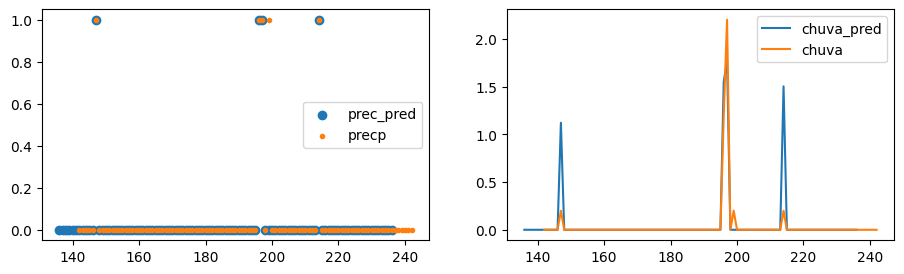

In [67]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,3))

plt.subplot(121)
ax1.scatter(rain.x.index, rain.x.precp, label='prec_pred')
ax1.scatter(dados_df.iloc[rain.x.index].index, dados_df.iloc[rain.x.index].precp, label='precp', marker='.')
plt.legend()

plt.subplot(122)
ax2.plot(rain.x.index, rain.x.chuva, label='chuva_pred')
ax2.plot(dados_df.iloc[rain.x.index].index, dados_df.iloc[rain.x.index].chuva, label='chuva')
plt.legend()

In [68]:
print(classification_report(dados_df.loc[rain.x.index].precp, rain.x.precp))
print('Regressor score: ',r2_score(dados_df.loc[rain.x.index].chuva, rain.x.chuva))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.80      0.89         5

    accuracy                           0.99       101
   macro avg       0.99      0.90      0.94       101
weighted avg       0.99      0.99      0.99       101

Regressor score:  0.5363432206673784


In [69]:
x = dados_valid_df.copy()

In [70]:
rain = Rain(x)
rain.transform()
rain.Classifier.feature_names_in_,rain.Regressor.feature_names_in_
rain.calculate()
#rain.x


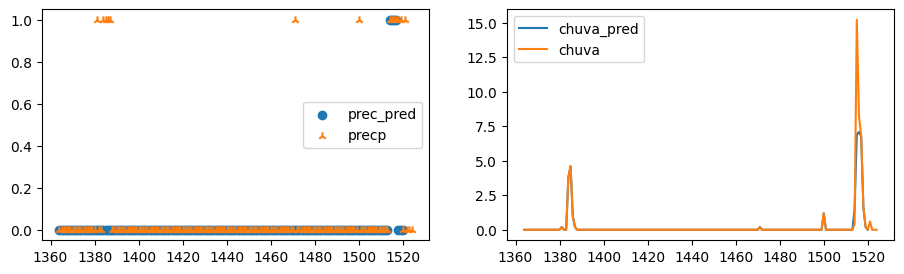

In [71]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,3))

plt.subplot(121)
ax1.scatter(rain.x.index, rain.x.precp, label='prec_pred', )
ax1.scatter(x.index, x.precp, label='precp', marker='2')
plt.legend()

plt.subplot(122)
ax2.plot(rain.x.index, rain.x.chuva, label='chuva_pred')
ax2.plot(x.index, x.chuva, label='chuva')
plt.legend()

In [72]:
print(classification_report(dados_valid_df.loc[rain.x.index].precp, rain.x.precp))
print('Regressor score: ',r2_score(dados_valid_df.loc[rain.x.index].chuva, rain.x.chuva))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       144
           1       1.00      0.31      0.47        13

    accuracy                           0.94       157
   macro avg       0.97      0.65      0.72       157
weighted avg       0.95      0.94      0.93       157

Regressor score:  0.8083549425611778
